# Introdução

## A análise abaixo foi feita utilizando dados de vendas de jogos de uma base extraida diretamente do site www.kaggle.com

## O objetivo da análise e extrair informações para saber o local e o tipo de jogo que as pessoas mais consomem para aumentar a lucratividade e consequentemente ajudar no avanço da empresa.

## Perguntas que tentaremos responder com esta análise:

1. Qual jogo é o mais vendido
2. Onde é o local com maior número de vendas.
3. Quais gêneros são mais vendidos

# 1. Importando Bibliotecas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 2. Carregando DataSet

In [14]:
df = pd.read_csv('base_vendas.csv')

In [16]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# 3. Removendo dados nulos

In [30]:
df['Year'].isnull().sum()

271

In [46]:
df['Publisher'].isnull().sum()

0

In [48]:
df = df.dropna(subset=["Year"])
df = df.dropna(subset=["Publisher"])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# 3. Analisando os dados

## Plataforma mais utilizada

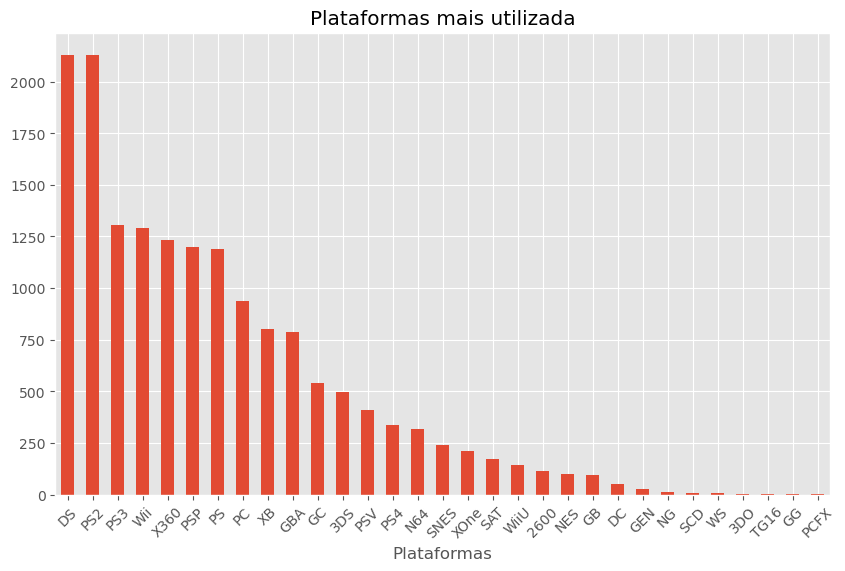

In [63]:
# Contar a frequência de cada nome na coluna 'Platform'
plataformas = df['Platform'].value_counts()

# Criando gráfico de barras
plt.figure(figsize=(10,6))
plataformas.plot(kind='bar')
plt.title('Plataformas mais utilizada')
plt.xlabel('Plataformas')
plt.xticks(rotation=45)
plt.show()

## Jogo mais vendido

In [80]:
# Somando as vendas de todas as regiões para cada jogo
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum(axis=1)

# Encontrar o jogo com o maior número total de vendas
jogo_mais_vendido_total = df.loc[df['Total_Sales'].idxmax()]

# Exibir o nome do jogo e o total de vendas
print(f"Jogo mais vendido no total: {jogo_mais_vendido_total['Name']}")
print(f"Total de vendas: {jogo_mais_vendido_total['Total_Sales']:.2f}")

Jogo mais vendido no total: Wii Sports
Total de vendas: 165.48


## Vendas por região

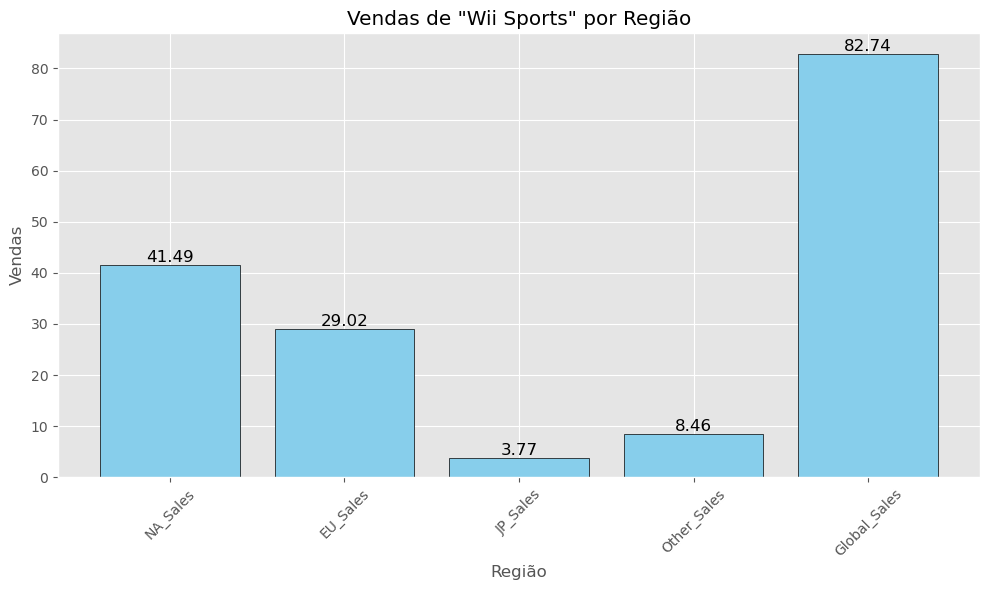

In [82]:
# Encontrar o jogo mais vendido e o total de vendas
jogo_mais_vendido_total = df.loc[df['Total_Sales'].idxmax()]

# Criar gráfico de barras para mostrar vendas do jogo mais vendido em cada região
regioes = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
vendas_regioes = jogo_mais_vendido_total[regioes]

plt.figure(figsize=(10,6))
bars = plt.bar(regioes, vendas_regioes, color='skyblue', edgecolor='black')

# Adicionar rótulos com os valores das vendas e o nome do jogo
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black', fontsize=12)

# Adicionar o nome do jogo como título e rótulos
plt.title(f'Vendas de "{jogo_mais_vendido_total["Name"]}" por Região')
plt.xlabel('Região')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gêneros mais vendidos

In [86]:
# Coluna de total de vendas
df['Total_Vendas'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum(axis=1)

# Agrupar por gênero e somar as vendas
vendas_por_genero = df.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

# Exibir o gênero mais vendido
print("Gênero mais vendido:")
print(vendas_por_genero)

Gênero mais vendido:
Genre
Action          3444.66
Sports          2618.08
Shooter         2051.89
Role-Playing    1847.57
Platform        1657.93
Misc            1579.15
Racing          1453.29
Fighting         888.13
Simulation       779.68
Puzzle           483.89
Adventure        468.95
Strategy         346.27
Name: Total_Sales, dtype: float64


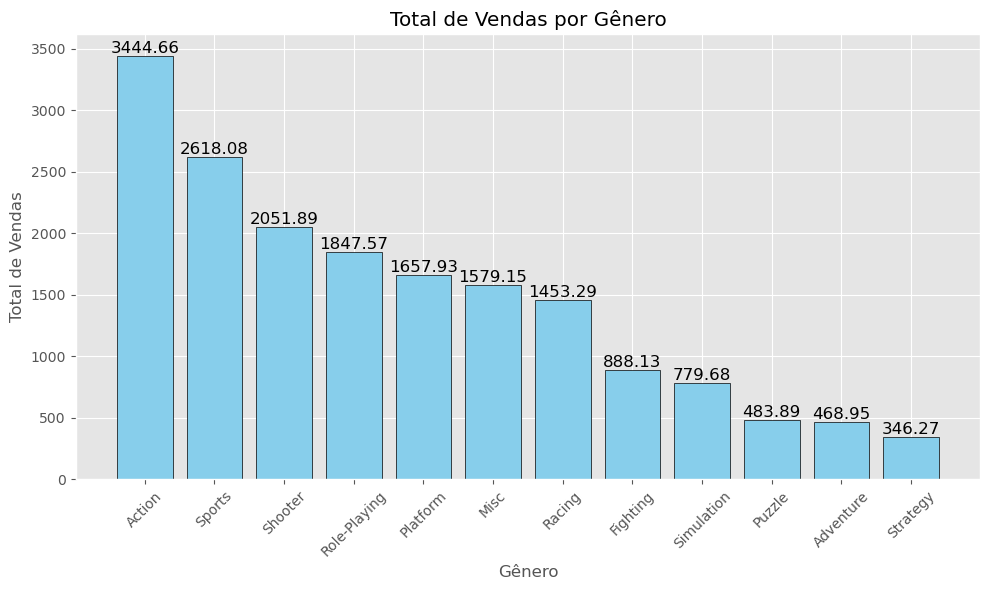

In [88]:
# Mesma informação em gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(vendas_por_genero.index, vendas_por_genero, color='skyblue', edgecolor='black')

# Rótulos com os valores das vendas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black', fontsize=12)

# Adicionando título e rótulos aos eixos
plt.title('Total de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()